# Evaluate metric on overfitted model

Check other overfitting module for more details


In [1]:
import random

import keras.models
from skimage.io import imshow

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from tools import sources
from tools import unetmodel
from tools import rect
from tools import unet_ext_masks


from skimage.transform import resize

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
def show_imgs(imgs, titles=None):
    n = len(imgs)
    _, axs = plt.subplots(ncols=n, figsize=(15, 5))
    
    for ix, ax in enumerate(axs):
        ax.imshow(imgs[ix])
        ax.axis('off')
        
        if titles:
            ax.set_title(titles[ix])

In [21]:
# Loading 8 images of reference data

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

ztx, zty, ztc, zto, ztdx1, ztdy1, ztdx2, ztdy2, ztrm, _ = sources.flattened_trainset_ex_2(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS, 8)

100%|██████████| 8/8 [00:00<00:00,  9.56it/s]


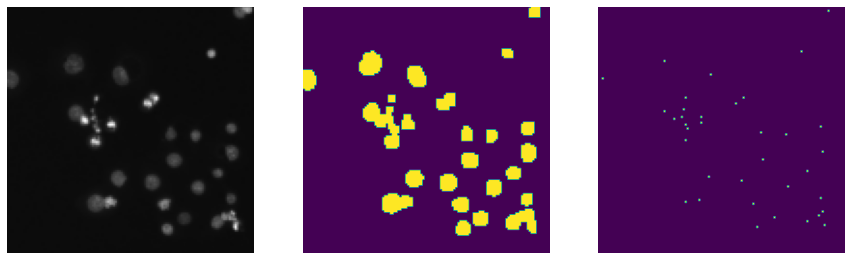

In [4]:
# Look at input, ground truth and computed nuclei center for first image

ix = 0
show_imgs([ztx[ix], zty[ix], ztc[ix]])

In [5]:
# Compile to False because testing is not needed
# This way custom loss functions are not needed
model_ext_2 = keras.models.load_model(sources.MODEL_PATH + '/model-dsbowl2018-unet-ext_2.h5', compile=False)

In [6]:
pty, ptc, pto, ptdx1, ptdy1, ptdx2, ptdy2 = model_ext_2.predict(ztx)

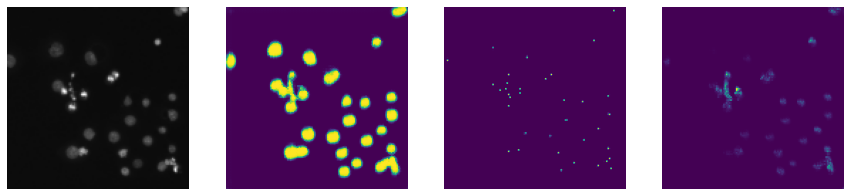

In [7]:
# Look at input, predicted masks, centers and overlaps (the latter is not used)

show_imgs([ztx[ix], pty[ix], ptc[ix], pto[ix]])

# Rectangles

In [10]:
rects = unet_ext_masks.get_rects_from_centers(ztc[ix], ptdx1[ix], ptdx2[ix], ptdy1[ix], ptdy2[ix])

In [11]:
len(rects)

36

In [14]:
import matplotlib.patches as patches

def show_rects(rects, ix, zty):
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(zty[ix])

    for (x1, y1, x2, y2) in rects:
        # Create a Rectangle patch and add patch to Axes
        ax.add_patch(patches.Rectangle((x1,y1),int(x2-x1+1),int(y2-y1+1),linewidth=1,edgecolor='r',facecolor='none'))

    plt.show()

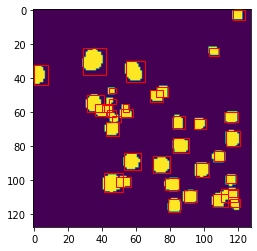

In [15]:
show_rects(rects, ix, zty)

In [141]:
masks = unet_ext_masks.extract_masks(pty[ix], rects, thr=0.35)

In [142]:
unet_ext_masks.precision_iou(ztrm[ix], masks)

0.41410085179684525

In [125]:
ious = unet_ext_masks.agg_iou(ztrm[ix], masks, thr=0.5)

0.9714285714285714


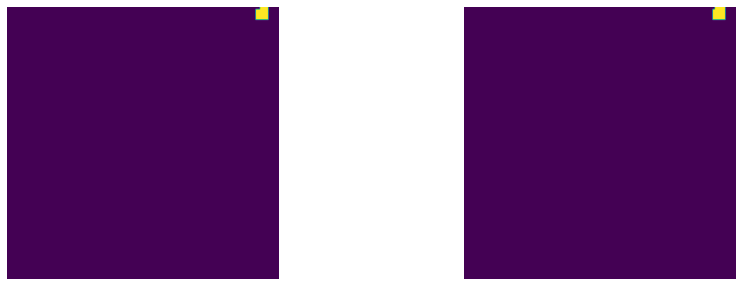

In [119]:
z, p, iou = ious[0]
print(iou)
show_imgs([masks[p], ztrm[ix][z]])

0.75


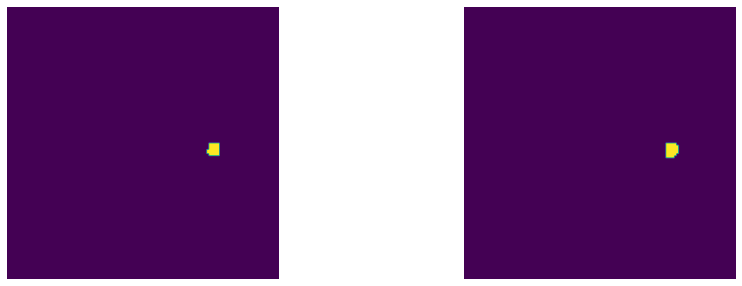

In [121]:
z, p, iou = ious[15]
print(iou)
show_imgs([masks[p], ztrm[ix][z]])

In [126]:
ious

[(18, 35, 0.9714285714285714),
 (25, 14, 0.958904109589041),
 (9, 21, 0.9318181818181818),
 (15, 28, 0.8833333333333333),
 (12, 9, 0.8804347826086957),
 (5, 17, 0.8611111111111112),
 (30, 22, 0.8507462686567164),
 (2, 8, 0.8421052631578947),
 (3, 0, 0.835820895522388),
 (28, 2, 0.8311688311688312),
 (4, 26, 0.8275862068965517),
 (13, 25, 0.8253968253968254),
 (6, 15, 0.8172043010752689),
 (8, 29, 0.7727272727272727),
 (19, 30, 0.7608695652173914),
 (35, 24, 0.75),
 (34, 16, 0.7446808510638298),
 (27, 32, 0.7428571428571429),
 (10, 1, 0.7107438016528925),
 (23, 13, 0.7105263157894737),
 (1, 11, 0.6964285714285714),
 (22, 20, 0.6909090909090909),
 (0, 12, 0.6875),
 (16, 23, 0.6842105263157895),
 (21, 19, 0.6721311475409836),
 (17, 3, 0.660377358490566),
 (20, 31, 0.6486486486486487),
 (14, 10, 0.6363636363636364),
 (31, 18, 0.6),
 (32, 34, 0.5588235294117647),
 (33, 27, 0.5),
 (7, 6, 0.5),
 (11, 5, 0.4666666666666667),
 (29, 33, 0.4642857142857143),
 (26, 7, 0.38095238095238093),
 (24, 4

In [131]:
unet_ext_masks.agg_iou([zty[ix]], [pty[ix]], thr=0.5) # Threshold used when making sub masks

[(0, 0, 0.8340782122905028)]

In [140]:
unet_ext_masks.agg_iou([zty[ix]], [pty[ix]], thr=0.35)

[(0, 0, 0.8525917926565875)]